In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.mlab as mlab
import iopro
from custom_python_utilities.histR import histRec, histR
from custom_python_utilities.plot_format import create_single_figure, format_axes

In [3]:
fitted = iopro.genfromtxt('condor_mle_cvxnl_results.csv')

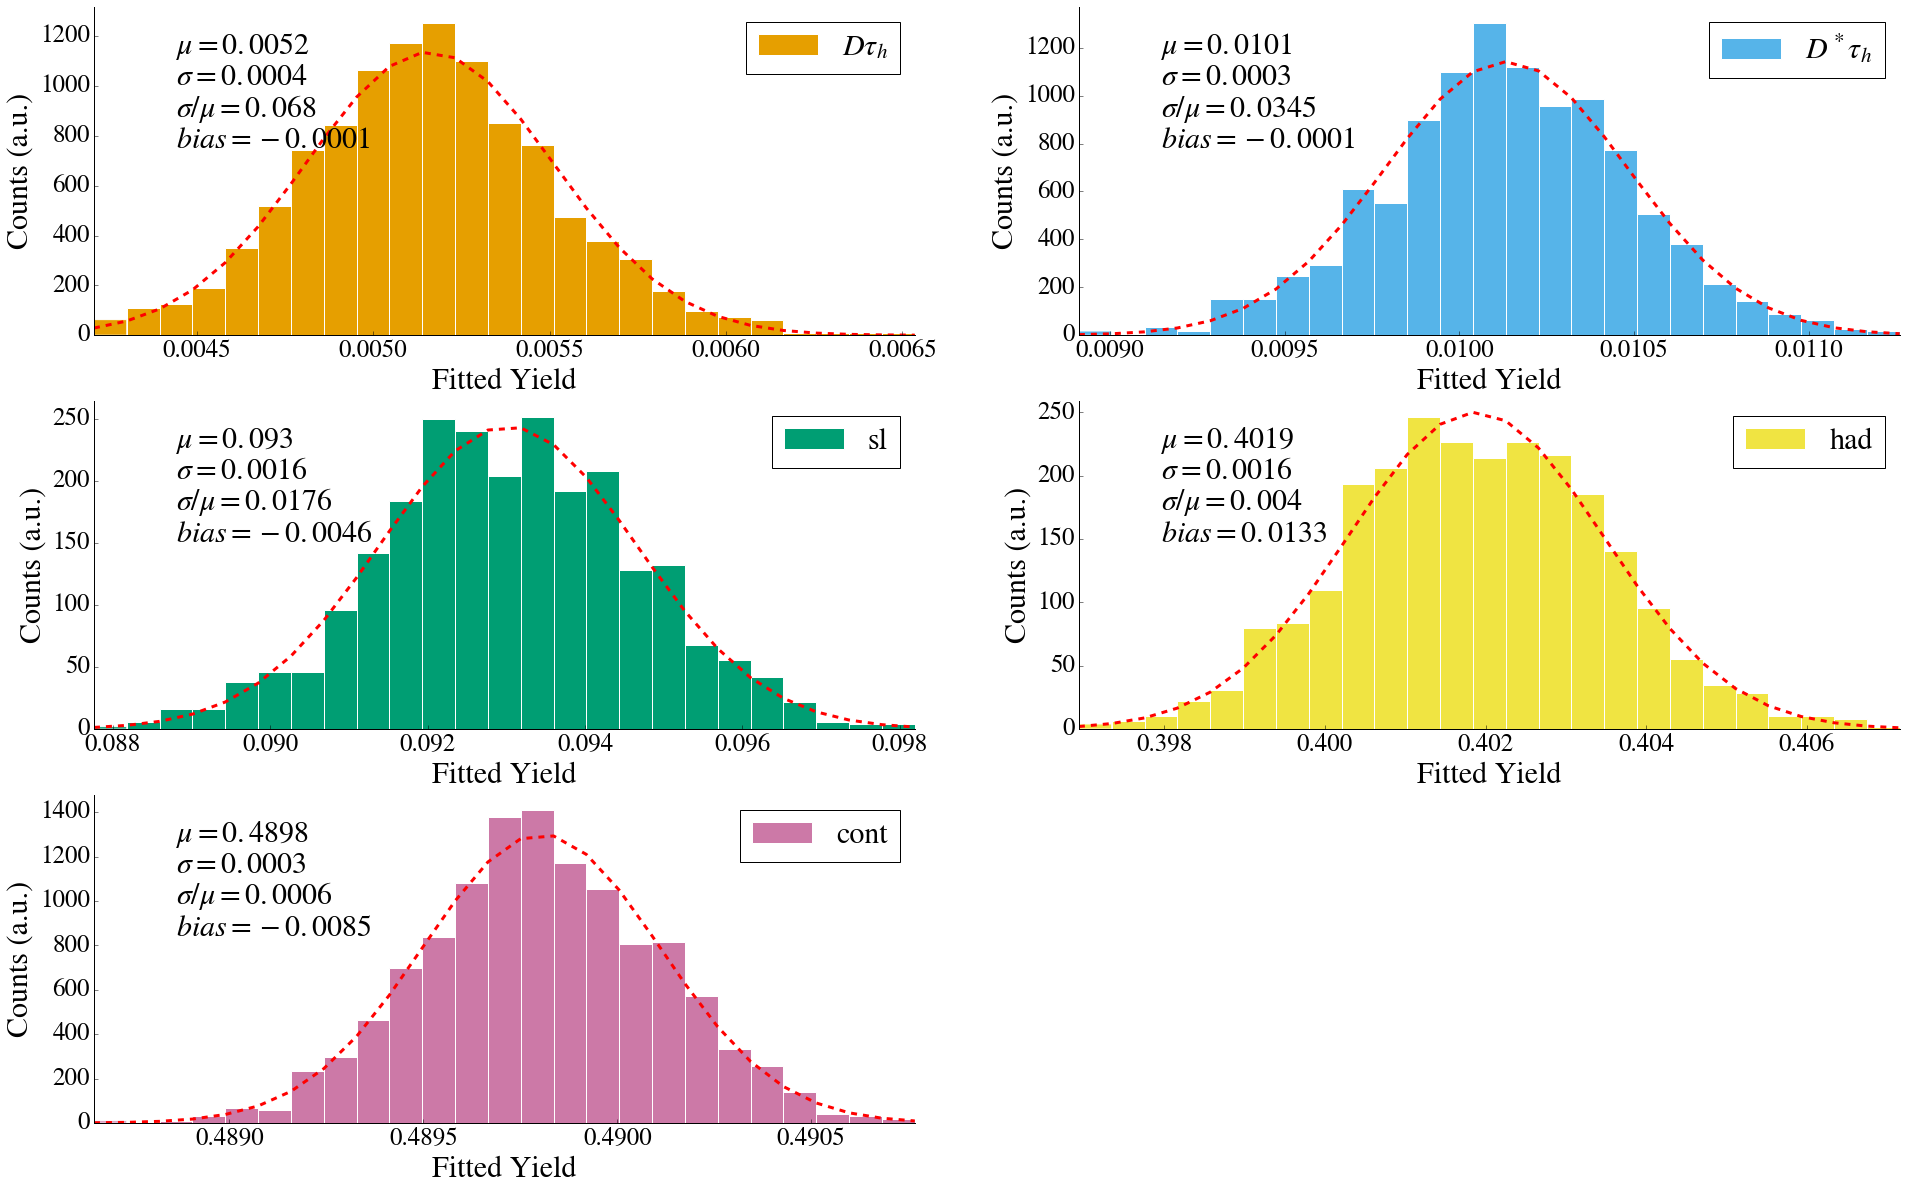

In [4]:
category_names = [ r'$D\tau_h$', r'$D^*\tau_h$', r'sl', r'had', r'cont' ]
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#CC79A7']
true_f = [ 0.00527027038150278256, 0.01025836847255434590, 0.09760324684671536023, 0.38860905629706645394, 0.49825905800216105737 ]
fig = plt.figure(figsize=(20*1.618, 20));
for i, c in enumerate([0,1,2,3,4]):
    
    hist_bins = 25
    
    mu, sigma = scipy.stats.norm.fit(fitted[:,c])
    ax = format_axes(fig.add_subplot(3, 2, i+1), tick_fontsize=25)

    histR(fitted[:,c], bins=hist_bins, normed=True,
          hist_colors=[colors[c]], 
          legend_fontsize=30, axislabel_fontsize=30,
          legend_names=[category_names[c]], legend=True,
          xlabel='Fitted Yield', ylabel='Counts (a.u.)', ax=ax);
    f_counts, f_bins = np.histogram(fitted[:,c], bins=hist_bins, normed=True)
    y = mlab.normpdf(f_bins, mu, sigma)
    ax.plot(f_bins, y, 'r--', linewidth=3);

        
    text_x = np.min(fitted[:,c]) + (np.max(fitted[:,c])-np.min(fitted[:,c])) * 0.1
    text_y = np.max(f_counts)*0.9
    ax.annotate(r'$\mu={0}$'.format(round(mu,4)), xy=(text_x,text_y), xytext=(text_x,text_y), fontsize=30)
    text_y = np.max(f_counts)*0.8
    ax.annotate(r'$\sigma={0}$'.format(round(sigma,4)), xy=(text_x,text_y), xytext=(text_x,text_y), fontsize=30)
    text_y = np.max(f_counts)*0.7
    ax.annotate(r'$\sigma/\mu={0}$'.format(round(sigma/mu,4)), xy=(text_x,text_y), xytext=(text_x,text_y), fontsize=30)
    text_y = np.max(f_counts)*0.6
    ax.annotate(r'$bias={0}$'.format(round(mu-true_f[c],4)), xy=(text_x,text_y), xytext=(text_x,text_y), fontsize=30)